# Autoregression Model (AR)

# Visually Check for Correlation

We will use a "lag plot" from pandas.
Data with autocorrelation gives rise to lag plots with linear patterns that follow the diagonal. As the level of
autocorrelation increases, the points cluster more tightly along the diagonal.

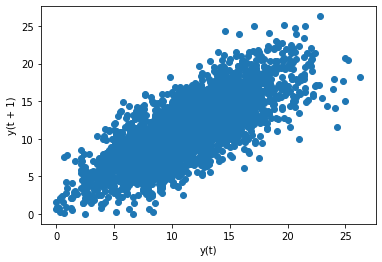

In [3]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)
pyplot.show()

# Correlation Calculation
We will call the .corr() function on the dataframe. 
The result produces a number to summarize how correlated two variables are between -1 (negatively correlated) and
+1 (positively correlated) with small values close to zero indicating low correlation and high
values above 0.5 or below -0.5 showing high correlation.

In [4]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


# Autocorrelation Plot

Pandas comes built in with a function called .autocorrelation_plot()
This will plot the correlation coefficient for each lag variable. This visually shows us what lag variables are good candidates to use.
The graph displays two dotted lines: 95% and 99% confidence intervals. Values outside of these lines are more statistically significant (and therefore can be good candidates).

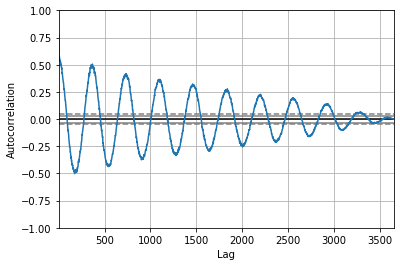

In [7]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

# Persistence Model

The simplest model is a persistence model. To make a prediction for the next day, we "persist" todays data and apply it to tomorrow.

In the example below, we will create a 7-day forecast, 1 day at a time (so it will be 7 1-day forecasts).

The dataset will be split with the last 7 days as our test and all the previous days as our training dataset. We will then forecast the first day, move forward one day (and compare our forecast to the actual data), forecast the next day, and repeat.

Test RMSE: 1.850


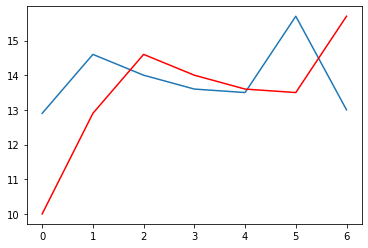

In [10]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

The plot above shows the actual value (blue) and our predicted value (red). The blue value from today becomes our predicted value (red) tomorrow.
The Root Mean Squared Error (RMSE) is also calculated. Basically, the RMSE tells you how concentrated the data is around the line of best fit (smaller is better).

# Autoregression Model (AR)

We can take the Persistence Model one step further by creating a model based on the lag variables (past data). Once we have the model and have fit it to our data, we can predict a 7-day forecast at one time (instead of 7 1-day forecasts).

Create model: AutoReg()
Train the model: fit()
This results in AutoRegResults object.
Predict: predict()

Lag: 29

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]

predicted=11.871275, actual=12.900000
predicted=13.053794, actual=14.600000
predicted=13.532591, actual=14.000000
predicted=13.243126, actual=13.600000
predicted=13.091438, actual=13.500000
predicted=13.146989, actual=15.700000
predicted=13.176153, actual=13.000000

Test RMSE: 1.225


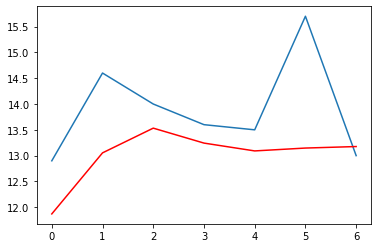

In [4]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Lag: 29\n')
print('Coefficients: %s' % model_fit.params)
print()

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, actual=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print()
print('Test RMSE: %.3f' % rmse)

# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()